In [2]:
import cv2
import numpy as np
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from matplotlib import pyplot
from utils import getXMPData

def save_new_band(path,reference_band,matrix):
    new_band = rasterio.open(path,'w',driver='Gtiff',
                          width=reference_band.width, 
                          height = reference_band.height, 
                          count=1, crs=reference_band.crs, 
                          transform=reference_band.transform, 
                          dtype='float64')
    new_band.write(matrix,1)
    new_band.close()

def printGrountTruth(filepath,image):
    with open(filepath, "r") as my_file:
        annotations_list = my_file.read().split('\n')
        print(annotations_list)

def get_band_combination(dataset_reader,combination_name='NDVI'):
    # Bands order at the raster file should be as ['Red','Green','Blue','RE','NIR']
    red = dataset_reader.read(1)
    green = dataset_reader.read(2)
    blue = dataset_reader.read(3)
    re = dataset_reader.read(4)
    nir = dataset_reader.read(5)
    band_combinations ={
        'NDVI': (np.where((nir+red)==0., 0, np.divide((nir-red),(nir+red)))),
        'GNDVI': (np.where((nir+green)==0., 0, (nir-green)/(nir+green))),
        'NDRE': (np.where((nir+re+red)==0., 0, (nir-re)/(nir+red))),
        'LCI': (np.where((nir+re)==0., 0, (nir-re)/(nir+re))),
        'OSAVI': (np.where((nir+red)==0., 0, 1.6*((nir-red)/(nir-red+0.16))))
    }
    return band_combinations[combination_name]


In [7]:
# Read reference image
image_path = '/home/manfred/workspace/multispectral-pineapple-detection/datasets/result/00000165.TIF'

bands = ['Red','Green','Blue','RE','NIR']
image = rasterio.open(image_path)

<class 'numpy.ndarray'>
uint8
(1300, 1600, 3)


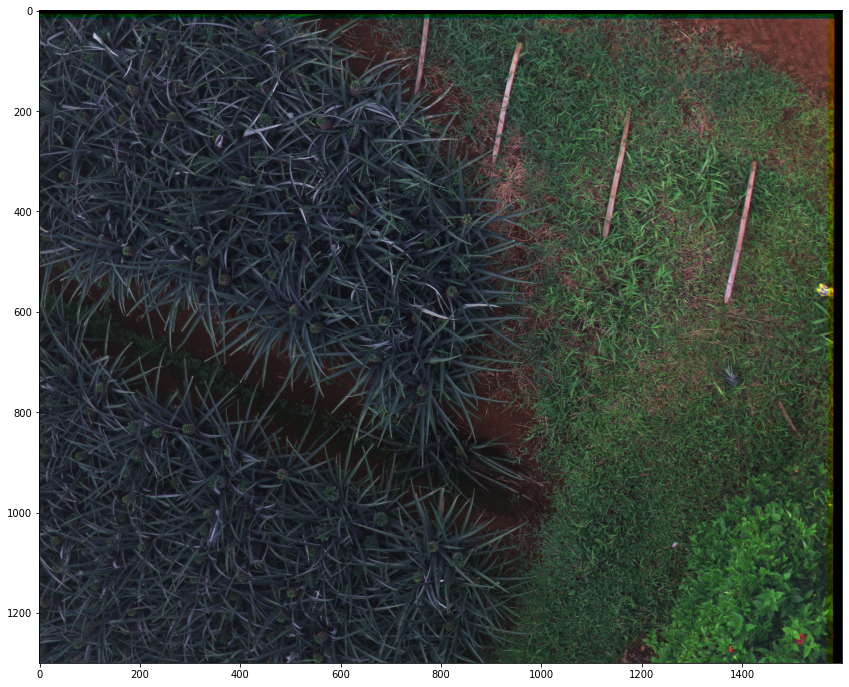

In [15]:
red = image.read(1).astype('uint8')
green = image.read(2).astype('uint8')
blue = image.read(3).astype('uint8')
rgb = np.dstack((red,green,blue))
print(type(rgb))
print(rgb.dtype)
print(rgb.shape)
#rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(18,12))
plt.imshow(rgb)

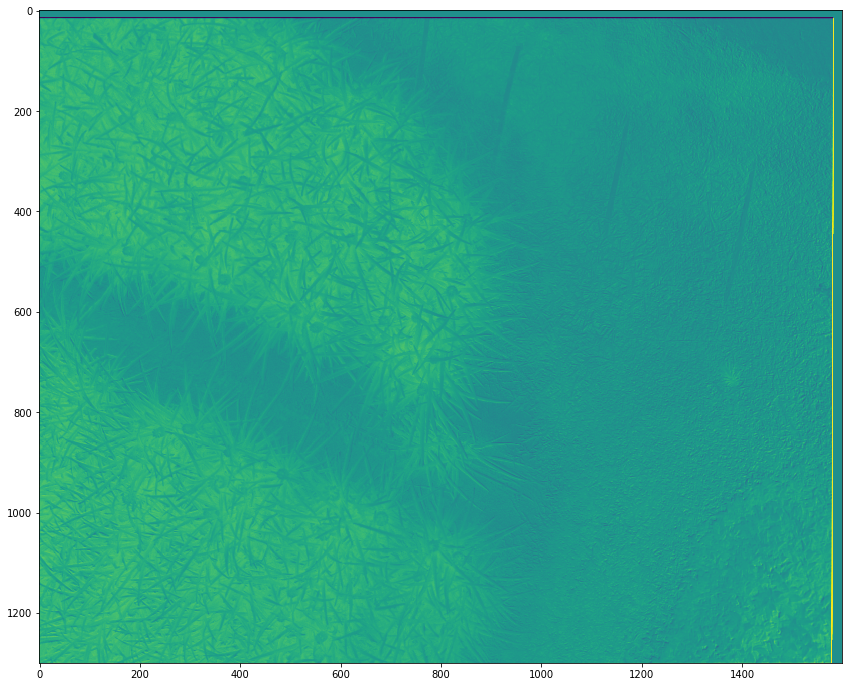

In [13]:
fig = plt.figure(figsize=(18,12))
plot.show(get_band_combination(image,'LCI'))

In [36]:
meta_data = getXMPData('data/multispectral_image/00000022_NIR.TIF')

#print(meta_data)

print(float(meta_data['RelativeOpticalCenterX']))
print(float(meta_data['RelativeOpticalCenterY']))
vignettingData = [float(number) for number in meta_data['VignettingData'].split(',')]
print(vignettingData)
print(float(meta_data['CalibratedOpticalCenterX']))
print(float(meta_data['CalibratedOpticalCenterY']))
print(float(meta_data['SensorGain']))
print(int(meta_data['ExposureTime']))
print(float(meta_data['SensorGainAdjustment']))
print(float(meta_data['Irradiance']))

0.0
0.0
[0.000218235, 1.20722e-06, -2.8676e-09, 5.1742e-12, -4.16853e-15, 1.36962e-18]
800.0
650.0
1.0
1141
0.962678
2932.176
